In [ ]:
#Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import cifar10
import numpy as np
from keras.optimizers import Adam

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


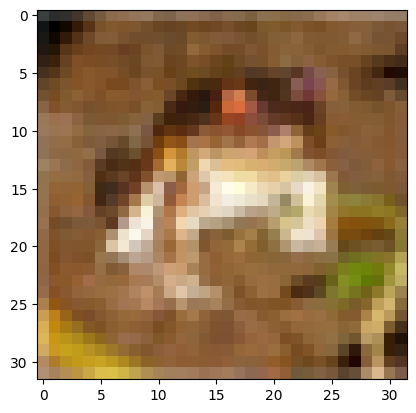

[6]


In [3]:
#load dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train[0])
plt.imshow(X_train[0])
plt.show()
print(y_train[0])

In [4]:
#preprocess the data
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

Single Layer Model

In [5]:
#single hidden layer MLP
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu')) #hidden layer
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=(0.2))

c:\Users\raghu\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1511 - loss: 2.6387 - val_accuracy: 0.1948 - val_loss: 2.0888
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1844 - loss: 2.0753 - val_accuracy: 0.1870 - val_loss: 2.0692
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1843 - loss: 2.0636 - val_accuracy: 0.1744 - val_loss: 2.0689
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1823 - loss: 2.0623 - val_accuracy: 0.1742 - val_loss: 2.0620
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1828 - loss: 2.0574 - val_accuracy: 0.1707 - val_loss: 2.0575
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1827 - loss: 2.0615 - val_accuracy: 0.1903 - val_loss: 2.0624
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1827 - loss: 2.0572 - val_accuracy: 0.1861 - val_loss: 2.0703
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1838 - loss: 2.0531 - val_accuracy: 0.

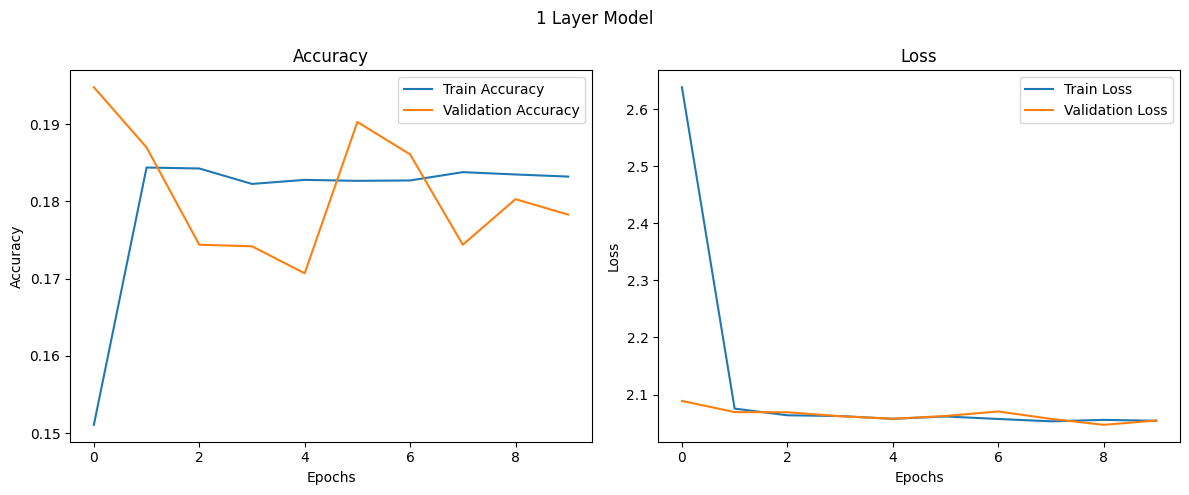

In [6]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.suptitle('1 Layer Model')
plt.tight_layout()
plt.show()

Three Layer Model

In [7]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(32, 32, 3)))
model_3.add(Dense(512, activation='relu')) #1st hidden layer
model_3.add(Dense(256, activation='relu')) #2nd hidden layer
model_3.add(Dense(128, activation='relu')) #3rd hidden layer
model_3.add(Dense(10, activation='softmax'))
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
history3 = model_3.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=(0.2))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2406 - loss: 2.3535 - val_accuracy: 0.3099 - val_loss: 1.9055
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3128 - loss: 1.8718 - val_accuracy: 0.3332 - val_loss: 1.8410
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3260 - loss: 1.8321 - val_accuracy: 0.2819 - val_loss: 1.9055
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3308 - loss: 1.8241 - val_accuracy: 0.3215 - val_loss: 1.8546
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3327 - loss: 1.8077 - val_accuracy: 0.3261 - val_loss: 1.8584
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3346 - loss: 1.8044 - val_accuracy: 0.3213 - val_loss: 1.8299
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3352 - loss: 1.8056 - val_accuracy: 0.3434 - val_loss: 1.8028
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3404 - loss: 1.7936 - val_acc

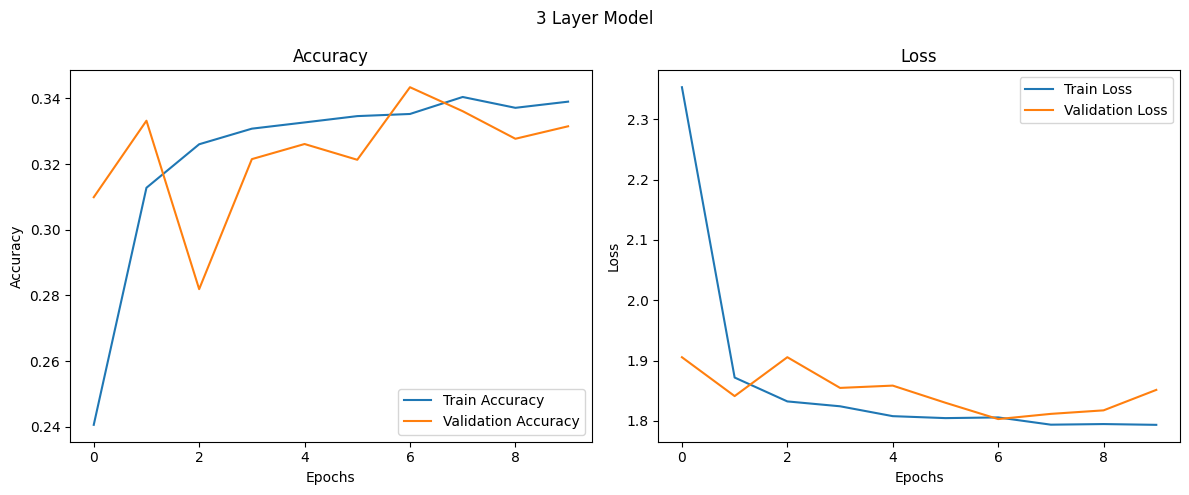

In [9]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.suptitle('3 Layer Model')
plt.tight_layout()
plt.show()

Five Layer Model

In [10]:
model_5 = Sequential()
model_5.add(Flatten(input_shape=(32, 32, 3)))
model_5.add(Dense(2048, activation='relu')) #5th layer
model_5.add(Dense(1024, activation='relu')) #4th layer
model_5.add(Dense(512, activation='relu')) #3rd layer
model_5.add(Dense(256, activation='relu')) #2nd layer
model_5.add(Dense(128, activation='relu')) #1st layer
model_5.add(Dense(10, activation='softmax'))
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
history5 = model_5.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=(0.2))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.1602 - loss: 3.7345 - val_accuracy: 0.1810 - val_loss: 2.0961
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.2024 - loss: 2.0607 - val_accuracy: 0.1919 - val_loss: 2.1318
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.2501 - loss: 1.9731 - val_accuracy: 0.2774 - val_loss: 1.9419
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.2604 - loss: 1.9617 - val_accuracy: 0.2531 - val_loss: 1.9650
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.2802 - loss: 1.9187 - val_accuracy: 0.2775 - val_loss: 1.9535
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.2892 - loss: 1.8983 - val_accuracy: 0.2888 - val_loss: 1.9192
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.2898 - loss: 1.9315 - val_accuracy: 0.2975 - val_loss: 1.8962
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.3020 - loss: 1.8794 - 

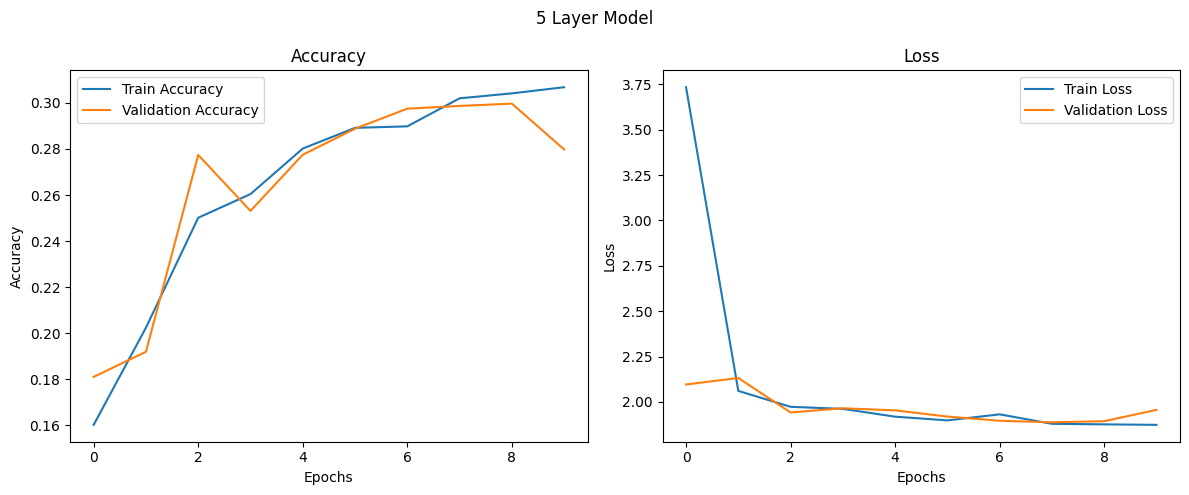

In [11]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history5.history['loss'], label='Train Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.suptitle('5 Layer Model')
plt.tight_layout()
plt.show()

In [12]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
print("Test loss of one layer model:", loss1)
print("Test accuracy of one layer model:", accuracy1)
print()
loss3, accuracy3 = model_3.evaluate(X_test, y_test)
print("Test loss of three layer model:", loss3)
print("Test accuracy of three layer model:", accuracy3)
print()
loss5, accuracy5 = model_5.evaluate(X_test, y_test)
print("Test loss of five layer model:", loss5)
print("Test accuracy of five layer model:", accuracy5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1836 - loss: 2.0410
Test loss of one layer model: 2.041006565093994
Test accuracy of one layer model: 0.18359999358654022

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3355 - loss: 1.8301
Test loss of three layer model: 1.8301435708999634
Test accuracy of three layer model: 0.33550000190734863

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2887 - loss: 1.9435
Test loss of five layer model: 1.9435017108917236
Test accuracy of five layer model: 0.28870001435279846
